<a href="https://colab.research.google.com/github/bernardoadribeiro/data-vistualization-covid19/blob/main/VIsualiza%C3%A7%C3%A3o_de_dados_Covid19_MG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Como executar este notebook

1. Será necessário o upload dos arquivos **.csv** que serão consultados.
Isto poderá ser feito, clicando no ícone de **pasta** no menu ao lado esquerdo para que a barra lateral seja expandida. Depois clicar com o botão direito do mouse na área vazia e clicar em **upload** e selecionar os arquivos citados abaixo e aguarde até o upload ser concluído para executar os blocos de códigos. 
   - CONFIRMADOS.csv
   - INTERNADOS.csv
   - OBITOS.csv
   - RECUPERADOS.csv
  

2. Para que o código funcione corretamente, **SEMPRE** execute cada célula na ordem em que estão. 
Para executar, basta clicar no botão de play que aparece do lado esquerdo de cada bloco de código (célula).
- Uma alternativa para executar TODAS as células de uma vez, é ir na opção "Runtime" no menu superior esquerdo, e clicar em **"Run All"** ou apertar **Ctrl + F9**



---


OBS.: Sempre que o notebook for reaberto, é necessário realizar o upload dos arquivos **.csv**.

OBS.2: Para conseguir realizar o upload dos arquivos, é necessário que você faça o login com sua conta do Google para acessar o Google Colab.


---


**PS.: Os algoritmos já foram executada previamente, o resultado da execucação de cada bloco de código (caso ele haja uma saída) irá aparecer logo abaixo dele. Mas se quiser executá-lo novamente para testar outras entradas, basta executar ele clicando no "play" que aparecer do canto superior a esquerda do bloco de código.**

***Lembrando que os blocos de código devem ser executados sequencialmente para evitar erros.***



---
---



#**Consultandos dados em CSV - Busca Linear**

A pesquisa Linear possui uma complexidade linear, ou seja **O(n)**, onde o tempo e processamento necessário para retornar a saída depende do quanto de dados são enviados na entrada.

Foi escolhido este algoritmo de busca pois neste caso, seria o algoritmo mais apropriada para consulta neste tipo de base de dados.

---

---



# **O que faz o algoritmo abaixo?**
O algoritmo implementado no bloco de código a seguir, realiza uma busca linear nos arquivos CSV importados, buscando pelos dados de casos CONFIRMADOS, RECUPERADOS e OBTIDOS do munícipio especificado pelo usuário.

## 1. Visualizar dados de um determinados **município**

In [ ]:
#Biblioteca para leitura de arquivos CSV
import csv 

#Carregando arquivos
confirmados_csv = csv.reader(open('CONFIRMADOS.csv'), delimiter=';')
recuperados_csv = csv.reader(open('RECUPERADOS.csv'), delimiter=';')
obitos_csv = csv.reader(open('OBITOS.csv'), delimiter=';')

total_confirmados = 0
total_obitos = 0
total_recuperados = 0

#Pesquisa
municipio = input("Município que deseja visualizar [Digite tudo em letras MAIUSCULAS e sem acentuação]: ")

# REALIZANDO PESQUISA LINEAR - Confirmados
for linha in confirmados_csv:
  municipio_residencia = linha[0]
  num_confirmados = linha[1]
  data = linha[2]
  micro_regiao = linha[5]
  macro_regiao = linha[6]
  
  if municipio_residencia == municipio:
    total_confirmados = total_confirmados + int(num_confirmados)

# REALIZANDO PESQUISA LINEAR - Recuperados
for linha in recuperados_csv:
  municipio_residencia = linha[0]
  num_recuperados = linha[1]
  data = linha[2]
  micro_regiao = linha[5]
  macro_regiao = linha[6]
  
  if municipio_residencia == municipio:
    if total_recuperados < int(num_recuperados):
      total_recuperados = int(num_recuperados)

# REALIZANDO PESQUISA LINEAR - Obitos
for linha in obitos_csv:
  municipio_residencia = linha[0]
  num_obitos = linha[1]
  data = linha[2]
  micro_regiao = linha[5]
  macro_regiao = linha[6]
  
  if municipio_residencia == municipio:
    total_obitos = total_obitos + int(num_obitos)


# IMPRIME RESULTADO DA PESQUISA
print("Total de casos CONFIRMADOS = ", total_confirmados)
print("Total de casos RECUPERADOS = ", total_recuperados)
print("Total de casos OBITOS = ", total_obitos)

Município que deseja visualizar [Digite tudo em letras MAIUSCULAS e sem acentuação]: LONTRA
Total de casos CONFIRMADOS =  717
Total de casos RECUPERADOS =  697
Total de casos OBITOS =  10


##2. Visualizar dados de uma determinada **Macro Região**

In [ ]:
#Biblioteca para leitura de arquivos CSV
import csv 

#Carregando arquivos
confirmados_csv = csv.reader(open('CONFIRMADOS.csv'), delimiter=';')
recuperados_csv = csv.reader(open('RECUPERADOS.csv'), delimiter=';')
obitos_csv = csv.reader(open('OBITOS.csv'), delimiter=';')

total_confirmados = 0
total_obitos = 0
total_recuperados = 0

#Pesquisa
macro = input("Macro Região que deseja visualizar [Digite tudo em letras MAIUSCULAS e sem acentuação]: ")

# REALIZANDO PESQUISA LINEAR - Confirmados
for linha in confirmados_csv:
  municipio_residencia = linha[0]
  num_confirmados = linha[1]
  data = linha[2]
  micro_regiao = linha[5]
  macro_regiao = linha[6]
  
  if macro == macro_regiao:
    total_confirmados = total_confirmados + int(num_confirmados)

#Não foi possível realizar uma pesquisa de casos RECUPERADOS por Macro Região pois a forma de contagem de casos implementada no RECUPERADOS.csv foi diferentes dos outros.

# REALIZANDO PESQUISA LINEAR - Obitos
for linha in obitos_csv:
  municipio_residencia = linha[0]
  num_obitos = linha[1]
  data = linha[2]
  micro_regiao = linha[5]
  macro_regiao = linha[6]
  
  if macro == macro_regiao:
    total_obitos = total_obitos + int(num_obitos)


# IMPRIME RESULTADO DA PESQUISA
print("Total de casos CONFIRMADOS = ", total_confirmados)
print("Total de casos OBITOS = ", total_obitos)

Macro Região que deseja visualizar [Digite tudo em letras MAIUSCULAS e sem acentuação]: NORTE
Total de casos CONFIRMADOS =  120625
Total de casos OBITOS =  2374


# **Visualização de Dados com Pandas, Matplotlib e plotly**

Os blocos de código abaixo são para visualização de dados e também para plotagem de gráficos em relação aos dados sobre o covid19 nos municípios de Minas Gerais, obtidos através dos arquivos .csv importados.

In [ ]:
#Importando Bibliotecas
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px

In [ ]:
"""
CARREGAR TODOS OS DATAFRAMES QUE SERÃO UTILIZADOS
"""
confirmados = pd.read_csv('CONFIRMADOS.csv', delimiter=';')
recuperados = pd.read_csv('RECUPERADOS.csv', delimiter=';')
obitos = pd.read_csv('OBITOS.csv', delimiter=';')

In [ ]:
"""
FILTRANDO DADOS DOS DATAFRAMES
"""
confirmadosFiltrados = confirmados.filter(items=['MUNICIPIO_RESIDENCIA', 'NUM_CASOS', 'DATA', 'Micro', 'Macro'])
recuperadosFiltrados = recuperados.filter(items=['MUNICIPIO_RESIDENCIA', 'NUM_RECUPERADOS', 'DATA', 'Micro', 'Macro'])
obitosFiltrados = obitos.filter(items=['MUNICIPIO_RESIDENCIA', 'NUM_OBITOS', 'DATA', 'Micro', 'Macro'])

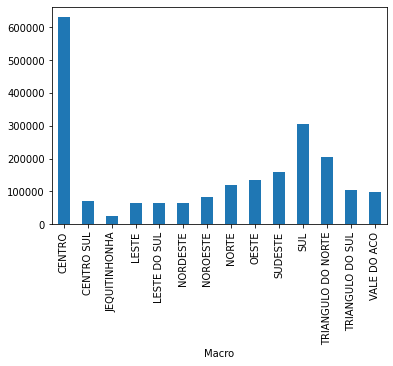

In [ ]:
'''
EXIBINDO QUANTIDADE TOTAL DE CASOS POR MACRO REGIÃO
'''
totalCasosMunicipio = confirmados.groupby(['Macro'])['NUM_CASOS'].sum()
totalCasosMunicipio.plot.bar()

In [ ]:
#Pesquisa
municipio = input("Município que deseja visualizar[Digite tudo em letras MAIUSCULAS e sem acentuação]: ")

#Soma do Total de Casos na cidade informada
confirmados[confirmados.MUNICIPIO_RESIDENCIA == municipio].groupby(['MUNICIPIO_RESIDENCIA',])['NUM_CASOS'].sum() 

Município que deseja visualizar[Digite tudo em letras MAIUSCULAS e sem acentuação]: JANUARIA


MUNICIPIO_RESIDENCIA
JANUARIA    3583
Name: NUM_CASOS, dtype: int64

In [ ]:
#Criando DataFrame com dados de uma cidade específica
cidade = confirmados[confirmados.MUNICIPIO_RESIDENCIA == 'LONTRA']

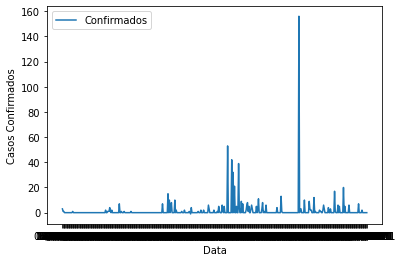

In [ ]:
#Gráfico de número de casos diário na cidade informada acima
plt.plot(cidade.DATA, cidade.NUM_CASOS)
plt.legend(['Confirmados'])
plt.xlabel('Data')
plt.ylabel('Casos Confirmados')
plt.show()

In [ ]:
# Cores
green = '#21bf73'

#plotando gráfico
fig = px.area(cidade, 
              x="DATA", 
              y="NUM_CASOS", 
              color='MUNICIPIO_RESIDENCIA', 
              height=600,
              title='Casos CONFIRMADOS ao longo do tempo por dia',
              color_discrete_sequence = [green])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [ ]:
# Faz o merge dos DataFrames de Confirmados, Recuperados e Obitos
df = confirmados.merge(recuperados, how = 'outer')
df = df.merge(obitos, how='outer')

In [ ]:
# DataFrame com os casos do municipio especificado
casos = df[df.MUNICIPIO_RESIDENCIA == 'MONTES CLAROS']

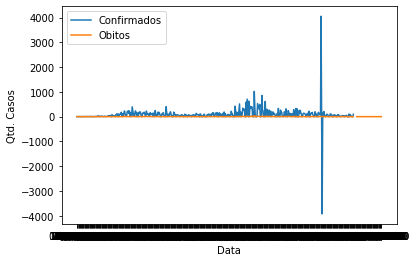

In [ ]:
# Plota o gráfico com casos Confirmados, Recuperados e Obtidos ao longo do tempo do muncípio informado acima
plt.plot(casos.DATA, casos.NUM_CASOS)
plt.plot(casos.DATA, casos.NUM_OBITOS)
#plt.plot(casos.DATA, casos.NUM_RECUPERADOS)
plt.legend(['Confirmados', 'Obitos', 'Recuperados'])
plt.xlabel('Data')
plt.ylabel('Qtd. Casos')
plt.show()

# **CONCLUSÃO**
Por meio da visualização dos dados através de gráficos e também obsersando a base de dados, é possível perceber inconsistencia nos dados. Há dias com casos negativos e com um grande subida brutal no número de casos que não condiz com a realidade. Talvez seja erro na base ou indício de **manipulação dos dados**. 


---



---


O arquivo CSV contendo os dados de pessoas que se recuperaram (RECUPERADOS.csv) possui uma forma de contagem diferentes das usada no CSV de Obitos e Confirmados, assim, dificultando na sua visualização através de gráficos, pois ele acaba distorcendo todo o gráfico como no exemplo abaixo:

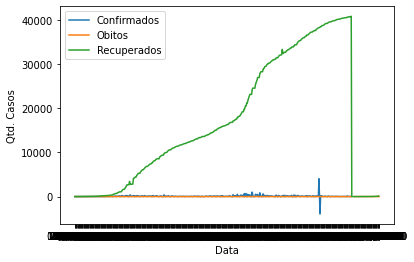

In [ ]:
# Plota o gráfico com casos Confirmados, Recuperados e Obtidos do muncípio informado acima
plt.plot(casos.DATA, casos.NUM_CASOS)
plt.plot(casos.DATA, casos.NUM_OBITOS)
plt.plot(casos.DATA, casos.NUM_RECUPERADOS)
plt.legend(['Confirmados', 'Obitos', 'Recuperados'])
plt.xlabel('Data')
plt.ylabel('Qtd. Casos')
plt.show()

---
---


Não consegui encontrar uma aplicação cabível nesta análise da dados para aplicar o algoritmo de ordenação. Pois ao tentar aplicar o algoritmo de ordenação ao dataframe, ele ordena apenas a coluna de quantidade de casos, o nome dos municípios não está acompanhando a quantidade como pode ver no exemplo abaixo:

In [ ]:
'''
EXIBINDO OS DADOS, SOMANDO, SEM ORDENAR
'''
totalCasosMunicipio = confirmados.groupby(['MUNICIPIO_RESIDENCIA'])['NUM_CASOS'].sum()
totalCasosMunicipio

MUNICIPIO_RESIDENCIA
ABADIA DOS DOURADOS        574
ABAETE                    1657
ABRE CAMPO                1274
ACAIACA                    234
ACUCENA                    808
                          ... 
VIRGINOPOLIS               898
VIRGOLANDIA                445
VISCONDE DO RIO BRANCO    4560
VOLTA GRANDE               479
WENCESLAU BRAZ             232
Name: NUM_CASOS, Length: 855, dtype: int64

In [ ]:
'''
ORDENANDO CIDADES PELO MAIOR NÚMERO DE CASOS
'''

def shellSort(lista):
    tam_lista = len(lista)
    salto = tam_lista // 2

    while salto > 0:
        i = salto
        while i < tam_lista:
            aux = lista[i]
            j = i - salto
            
            while j>=0:
                if lista[j] > aux:
                    lista[j+salto] = lista[j] 
                    lista[j] = aux 
                    j = j - salto
                else:
                    break
            
            i = i + 1
        salto = salto // 2

totalCasosMunicipio = confirmados.groupby(['MUNICIPIO_RESIDENCIA',])['NUM_CASOS'].sum()
shellSort(totalCasosMunicipio)
totalCasosMunicipio


NameError: ignored

Então, para não passar em branco esta parte do trabalho, eu o construi um exemplo aplicando o algoritmo de ordenação. Segue abaixo o exemplo do **Shell Sort** ordenando uma lista com 100 mil elementos.

Foi escolhido o Shell Sort por ser um algoritmo de fácil implementação e possui complexidade **O(n log n)**, que é conhecido do dividir para conquistar. O Shell Sort divide a lista em sublistas e vai ordenando parte por parte até que o vetor esteja totalmente ordenado.

In [ ]:
import random
import time

def shellSort(lista):
    tam_lista = len(lista)
    salto = tam_lista // 2

    while salto > 0:
        i = salto
        while i < tam_lista:
            aux = lista[i]
            j = i - salto
            
            while j>=0:
                if lista[j] > aux:
                    lista[j+salto] = lista[j] 
                    lista[j] = aux 
                    j = j - salto
                else:
                    break
            
            i = i + 1
        salto = salto // 2

lista = list(range(0, 100000+1)) #O segundo atributo é o tamanho total de elemento presentes na lista que deseja ordenar.
random.shuffle(lista) #embaralha a lista
print(lista)

print("\n", "=="*70, "\n")

shellSort(lista)
depois = time.time()

print(lista)



[71591, 25084, 90552, 36651, 36458, 22469, 62251, 53292, 66178, 48647, 77428, 68088, 19767, 69918, 61422, 39559, 89844, 84159, 81155, 96453, 52105, 93506, 33508, 45087, 47505, 89084, 35771, 36626, 3216, 71744, 69745, 20294, 19726, 42446, 69337, 57146, 77427, 89066, 64404, 40003, 54237, 41105, 61374, 69931, 48558, 80066, 30834, 6896, 80504, 90966, 2525, 18441, 61297, 56407, 35887, 59733, 95966, 54545, 30687, 44850, 16850, 67541, 45369, 16950, 19243, 94352, 97625, 38250, 4972, 75474, 567, 54886, 88072, 58861, 7820, 58940, 78449, 31181, 73474, 93479, 87647, 40926, 54485, 2117, 51184, 71835, 73748, 53917, 32953, 1963, 19424, 39055, 20454, 95621, 41551, 19112, 80767, 85358, 94098, 61479, 74379, 97868, 79424, 58501, 33920, 3690, 92104, 40489, 88145, 3325, 68862, 12686, 27973, 53854, 94662, 63871, 16566, 77109, 33444, 43856, 69546, 74458, 88209, 29082, 51123, 25514, 25519, 66359, 19465, 59545, 76177, 68282, 71329, 9089, 29606, 67361, 69225, 17807, 85740, 29306, 80734, 21673, 10426, 38599, 155

No centro da tela inferior é possível ver o tempo que o algoritmo **SHELL SORT** levou para ordenar a quantidade de elemento informados. (Para que seja mostrado é necessário executar o bloco de código anterior)